# Counts Profiles with Gammapy Toy Example

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
from gammapy.maps import Map, HpxGeom
from gammapy.maps.utils import fill_poisson
from gammapy.image import ImageProfileEstimator

In [3]:
geom_hpx = HpxGeom(nside=256, coordsys='GAL')

In [4]:
counts = Map.from_geom(geom_hpx)
fill_poisson(counts, mu=4, random_state=0)
counts.unit = 'ct'

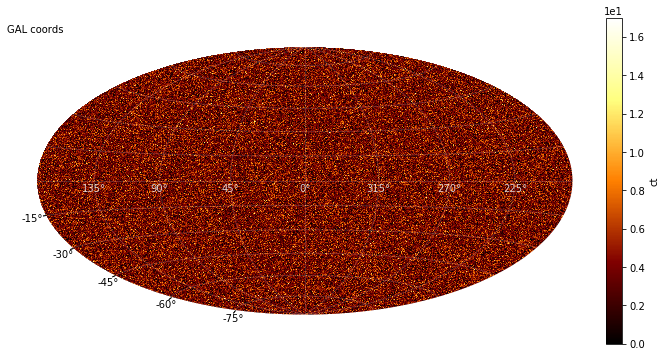

In [5]:
plt.figure(figsize=(12, 6))
counts.plot(add_cbar=True, width_pix=None);

In [6]:
mask = Map.from_geom(geom_hpx)

coords = geom_hpx.get_coord()
mask.data = (coords.lon < 45) ^ (coords.lon > 315)
mask.data = mask.data & (np.abs(coords.lat) < 80)

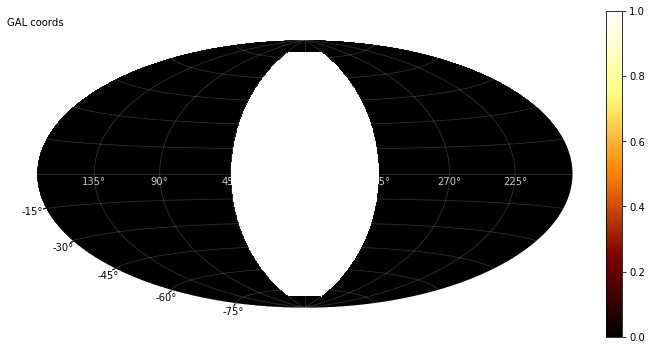

In [7]:
plt.figure(figsize=(12, 6))
mask.plot(add_cbar=True, width_pix=None);

# Latitude Profile

In [8]:
# define latitude range of 0 to 80 deg, using a step size of 2 deg
lat_edges = Angle(np.arange(0, 80, 2), 'deg')
estimator = ImageProfileEstimator(x_edges=lat_edges, axis='lat', method='mean')

In [9]:
lat_profile = estimator.run(image=counts, mask=mask)

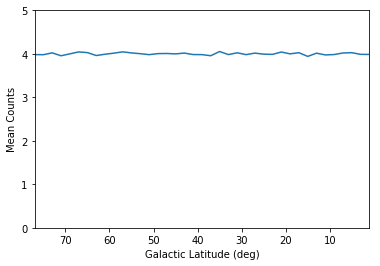

In [10]:
lat_profile.plot()
plt.ylim(0, 5)
plt.xlabel('Galactic Latitude (deg)')
plt.ylabel('Mean Counts');

# Longitude Profile

In [11]:
# define latitude range of 0 to 80 deg, using a step size of 2 deg
lon_edges = Angle(np.arange(-40, 40, 2), 'deg')
estimator = ImageProfileEstimator(x_edges=lon_edges, axis='lon', method='mean')

In [12]:
lon_profile = estimator.run(image=counts, mask=mask)

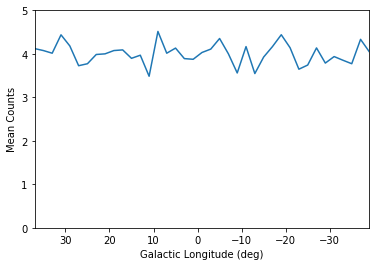

In [13]:
lon_profile.plot()
plt.ylim(0, 5)
plt.xlabel('Galactic Longitude (deg)')
plt.ylabel('Mean Counts');